## Carregando dados

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns; sns.set()

from google.cloud.bigquery import Client, QueryJobConfig
client = Client()
query = """SELECT * FROM `hacka-dados.hacka_dados.tabela_dados_hacka`"""
job = client.query(query)
df = job.to_dataframe()

## Limpeza

#### Notação de células vazias

In [ ]:
def uniform_missing_values(df, notacoes=['nan', '']):
    obj_cols = df.columns[df.dtypes=='object']
    for col in obj_cols:
        for value in notacoes:
            df[col] = df[col].replace(value, np.nan)
    return df

In [ ]:
df = uniform_missing_values(df, notacoes=['nan', ''])

# Descomente para conferir valores diferentes para notações ou conferir substituição (se já foi feita).
# for col in obj_cols: print(f'{col}: {df[col].unique()}'); print()

#### Células vazias e nulas por coluna

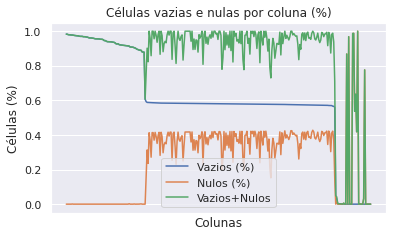

In [ ]:
empty = df.isna().sum().nlargest(df.shape[1]) / df.shape[0]
null = (df==0).sum().nlargest(df.shape[1]) / df.shape[0]

fig, ax = plt.subplots(figsize=(6, 3.5))
empty.plot()
null.loc[empty.index].plot() # descomente para incluir valores nulos
(empty+null.loc[empty.index]).plot() # descomente para incluir valores nulos
ax.set(
    xticks=[],
    xlabel='Colunas',
    ylabel='Células (%)',
    title='Células vazias e nulas por coluna (%)',
)
ax.legend(['Vazios (%)', 'Nulos (%)', 'Vazios+Nulos']); plt.show()

#### Células vazias e nulas por linha

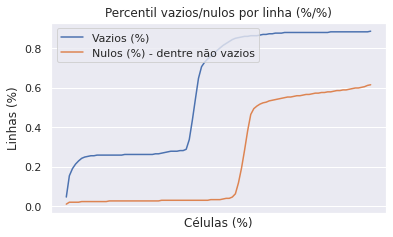

In [ ]:
empty = df.isna().sum(1).nlargest(df.shape[0]) / df.shape[1]
null = (df==0).sum(1).nlargest(df.shape[0]) / df.shape[1]

fig, ax = plt.subplots(figsize=(6, 3.5))
ax.plot(np.percentile(empty, range(100)))
ax.plot(np.percentile(null, range(100)))
ax.set(
    xticks=[],
    xlabel='Células (%)',
    ylabel='Linhas (%)',
    title='Percentil vazios/nulos por linha (%/%)',
)
ax.legend(['Vazios (%)', 'Nulos (%) - dentre não vazios'], loc='upper left'); plt.show()

## Transformação de dados

In [ ]:
data = df.copy() #; data = data[sel_cols]

# import preprocessing functions
from sklearn.preprocessing import LabelEncoder as le, MinMaxScaler as mms

# extract columns for each data type
int_cols, obj_cols, float_cols = (
    data.select_dtypes([datatype]).columns.tolist() for datatype in ('int64', 'object', 'float')
)

#### Scale Float Columns
data[float_cols] = mms().fit_transform(data[float_cols]) # eliminates negative values

# fill missing values for float columns
for col in float_cols:
    # data[col].fillna(data[col].mean(), inplace=True)
    data[col].fillna(-1, inplace=True)

#### Label Encode Categorical Columns
for col in obj_cols:
    # data[col].fillna((-1 if col in int_cols else '-1'), inplace=True)
    data[col] = le().fit_transform(data[col]) # fill missing values automatically



## Carregando dados

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns; sns.set()

from google.cloud.bigquery import Client, QueryJobConfig
client = Client()
query = """SELECT * FROM `hacka-dados.hacka_dados.tabela_dados_hacka`"""
job = client.query(query)
df = job.to_dataframe()

## Limpeza

#### Notação de células vazias

In [ ]:
def uniform_missing_values(df, notacoes=['nan', '']):
    obj_cols = df.columns[df.dtypes=='object']
    for col in obj_cols:
        for value in notacoes:
            df[col] = df[col].replace(value, np.nan)
    return df

In [ ]:
df = uniform_missing_values(df, notacoes=['nan', ''])

# Descomente para conferir valores diferentes para notações ou conferir substituição (se já foi feita).
# for col in obj_cols: print(f'{col}: {df[col].unique()}'); print()

#### Células vazias e nulas por coluna

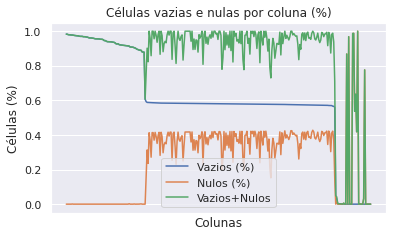

In [ ]:
empty = df.isna().sum().nlargest(df.shape[1]) / df.shape[0]
null = (df==0).sum().nlargest(df.shape[1]) / df.shape[0]

fig, ax = plt.subplots(figsize=(6, 3.5))
empty.plot()
null.loc[empty.index].plot() # descomente para incluir valores nulos
(empty+null.loc[empty.index]).plot() # descomente para incluir valores nulos
ax.set(
    xticks=[],
    xlabel='Colunas',
    ylabel='Células (%)',
    title='Células vazias e nulas por coluna (%)',
)
ax.legend(['Vazios (%)', 'Nulos (%)', 'Vazios+Nulos']); plt.show()

#### Células vazias e nulas por linha

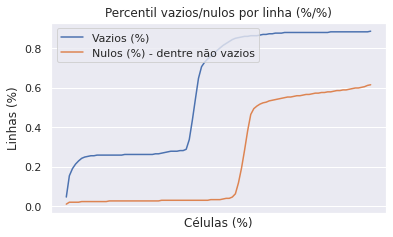

In [ ]:
empty = df.isna().sum(1).nlargest(df.shape[0]) / df.shape[1]
null = (df==0).sum(1).nlargest(df.shape[0]) / df.shape[1]

fig, ax = plt.subplots(figsize=(6, 3.5))
ax.plot(np.percentile(empty, range(100)))
ax.plot(np.percentile(null, range(100)))
ax.set(
    xticks=[],
    xlabel='Células (%)',
    ylabel='Linhas (%)',
    title='Percentil vazios/nulos por linha (%/%)',
)
ax.legend(['Vazios (%)', 'Nulos (%) - dentre não vazios'], loc='upper left'); plt.show()

## Transformação de dados

In [ ]:
data = df.copy() #; data = data[sel_cols]

# import preprocessing functions
from sklearn.preprocessing import LabelEncoder as le, MinMaxScaler as mms

# extract columns for each data type
int_cols, obj_cols, float_cols = (
    data.select_dtypes([datatype]).columns.tolist() for datatype in ('int64', 'object', 'float')
)

#### Scale Float Columns
data[float_cols] = mms().fit_transform(data[float_cols]) # eliminates negative values

# fill missing values for float columns
for col in float_cols:
    # data[col].fillna(data[col].mean(), inplace=True)
    data[col].fillna(-1, inplace=True)

#### Label Encode Categorical Columns
for col in obj_cols:
    # data[col].fillna((-1 if col in int_cols else '-1'), inplace=True)
    data[col] = le().fit_transform(data[col]) # fill missing values automatically

